In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步 E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata
os.chdir(r'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata')


In [10]:
# Reload the new file provided by the user
new_file_path = 'exposure_by_year_and_province_sum_pop_exposure.csv'
data_new = pd.read_csv(new_file_path)

# Calculate the total exposure for each province per year
province_yearly_exposure = data_new.groupby(['Year'])['Aging_Population_Exposure'].sum().reset_index()

# Save the results to a new CSV file
output_province_file_path = 'yearly_population_exposure.csv'
province_yearly_exposure.to_csv(output_province_file_path, index=False)


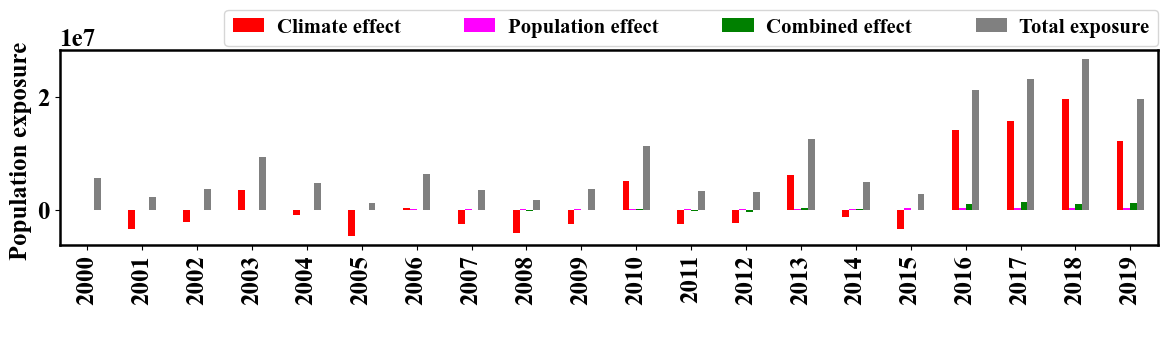

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设您的数据如下所示
data = pd.read_csv('heatwave_effects_decomposition-2000-2019.csv', engine='python', encoding="UTF-8")
df = pd.DataFrame(data)

# 颜色
my_color = ['red', 'magenta', 'green', 'grey']

# 创建bar plot
fig, ax1 = plt.subplots(figsize=(12, 3))
plt.subplots_adjust(left=0.06, right=0.975, top=0.85, bottom=0.2)
ax1 = df.plot(x="year", y=["Climate effect", "Population effect", "Combined effect", "Total exposure"], kind="bar", ax=ax1, color=my_color)

# 添加y轴标签
ax1.set_ylabel('Population exposure ', fontsize=18)

# 添加左上角字母
# ax1.text(x=0.06, y=0.8, s="(a)", size=20, color='black', transform=ax1.transAxes)

# 设置x轴标签
ax1.set_xlabel(' ')

# 添加图例
leg = plt.legend(fontsize=15, bbox_to_anchor=(0.15, 1.02, 0.85, 1.12), loc='lower left', handletextpad=0.6,
                 ncol=10, mode="expand", borderaxespad=0., handlelength=1.5)

# plt.text(x=2000, y=2.5e+07, s="(person-days)", size=14, color='black')

# 调整边框的宽度和颜色
for spine in ax1.spines.values():
    spine.set_linewidth(1.8)
    spine.set_edgecolor("black")

# 保存图片
plt.savefig('00 Decompose_the_effect_and_all_exposure——interaction.png', dpi=400, facecolor="none", transparent=True)
plt.show()


In [13]:

import statsmodels.api as sm
import seaborn as sns
from matplotlib import rcParams


In [14]:
#### Regressions, no intercept addition is needed because we're using SK LEARN HERE 

def lm_func(df, col):
    
    "simple linear model of a time series data, returns coef"
    
    # Get Data
    X_year = np.array(df["year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = int(model.params[1])
    #coef = int(coef)
            
    # R2 and P
    r2 = model.rsquared_adj
    p = model.pvalues[0]
    
    return coef, round(r2, 2), round(p, 4)


898159 0.42 0.0013


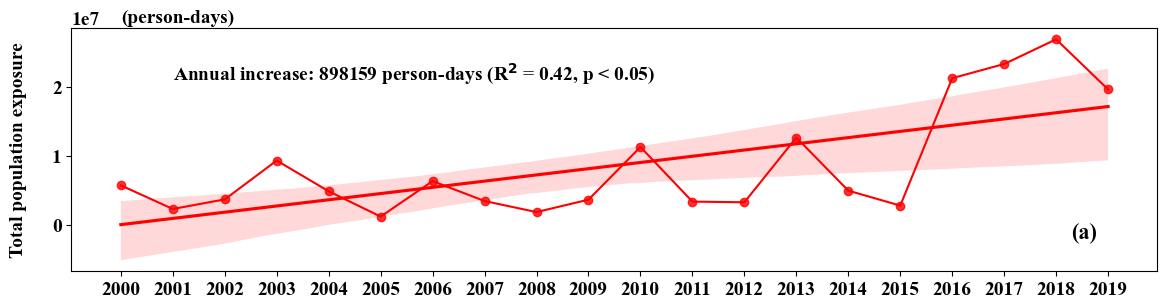

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the figure size and adjust the layout
fig, ax = plt.subplots(figsize=(12, 3))
plt.subplots_adjust(left=0.07, right=0.975, top=0.9, bottom=0.09)

# Set the font for the plot
plt.rcParams['font.sans-serif'] = 'Times New Roman'

# Create the regression plot and line plot
g = sns.regplot(x="year", y="Total exposure", data=df, color="r")
g = sns.lineplot(data=df, x="year", y="Total exposure", color="r")

# Calculate the regression coefficients, R^2, and p-value
coef, r2, p = lm_func(df, 'Total exposure')
print(coef, r2, p)

# Add the text with R^2 as a superscript
text = f'Annual increase: {round(coef, 1)} person-days (R2^2 = {round(r2, 2)}, p < 0.05)'
plt.text(x=2001, y=2.1e+07, s=text, size=14, color='black')
plt.text(x=2000, y=2.93e+07, s="(person-days)", size=14, color='black')
plt.text(x=2018.28, y=-0.2e+07, s="(a)", size=16, color='black')
# plt.text(x=2000, y=2.93e+07, s="(person-days)", size=14, color='black')
# Format the x-axis to show the years properly
ax.set_ylabel('Total population exposure', labelpad=18)
ax.set_xlabel('')
ax.set_xticks(df['year'])
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))

# Save the plot
plt.savefig('01Total_exposure11.png', dpi=300)
plt.show()
